
Linear Regression
Train MSE: 0.2145556575302731
Test MSE: 0.19884995690517665
Coefficients: [ 4.92061858e+00 -3.01473081e+00  9.69293153e-01  1.98504023e-03
 -7.55759060e-02  8.40542938e-02 -9.61498042e-02  5.23801732e-03
  3.42892207e-02 -3.66696403e-02]

Ridge Regression (L2)
Train MSE: 0.22182615117711552
Test MSE: 0.24934143950438276
Coefficients: [ 4.83458338e+00 -2.96486378e+00  9.48642849e-01  3.76909569e-03
 -7.41620476e-02  1.06928410e-01 -8.18720471e-02  1.01870993e-02
  4.94063808e-02 -2.85151467e-02]

Lasso Regression (L1)
Train MSE: 1.1832535532401731
Test MSE: 2.8096121121029283
Coefficients: [ 4.28830382 -2.40708451  0.30167294  0.          0.          0.
  0.          0.          0.          0.        ]


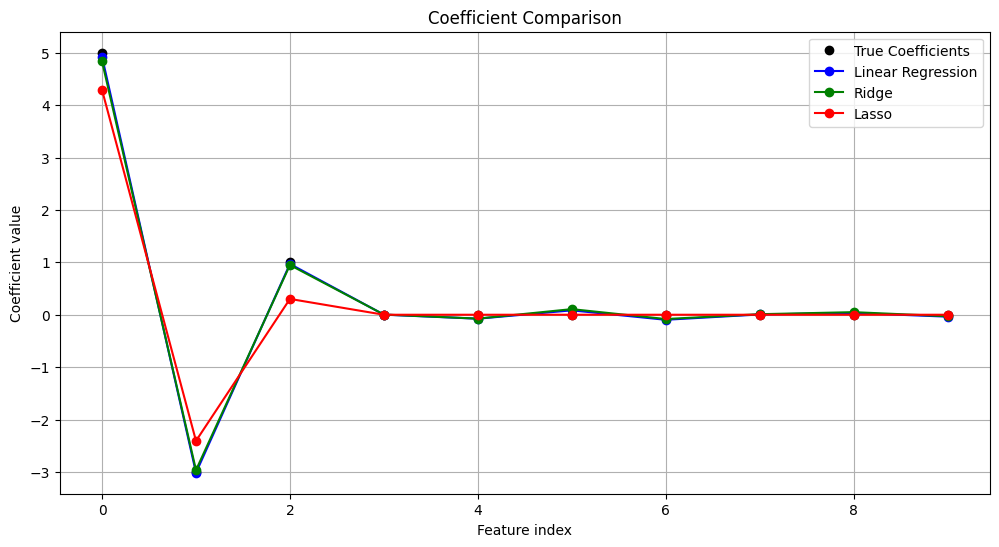

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Generate synthetic dataset
np.random.seed(42)
n_samples, n_features = 100, 10

X = np.random.randn(n_samples, n_features)

# Only first 3 features are relevant
true_coefs = np.array([5, -3, 1] + [0]*(n_features - 3))
y = X @ true_coefs + np.random.randn(n_samples) * 0.5  # Add noise

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Fit models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.5)

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# 4. Predict and evaluate
def evaluate(model, name):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Train MSE:", mean_squared_error(y_train, train_pred))
    print("Test MSE:", mean_squared_error(y_test, test_pred))
    print("Coefficients:", model.coef_)

evaluate(lr, "Linear Regression")
evaluate(ridge, "Ridge Regression (L2)")
evaluate(lasso, "Lasso Regression (L1)")

# 5. Plot coefficients
plt.figure(figsize=(12, 6))
plt.plot(true_coefs, 'ko', label='True Coefficients')
plt.plot(lr.coef_, 'b-o', label='Linear Regression')
plt.plot(ridge.coef_, 'g-o', label='Ridge')
plt.plot(lasso.coef_, 'r-o', label='Lasso')
plt.legend()
plt.title("Coefficient Comparison")
plt.xlabel("Feature index")
plt.ylabel("Coefficient value")
plt.grid(True)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas

# 1. Prepare the data
# Let's create a few datasets to compare their distributions
np.random.seed(42) # for reproducibility

# Dataset 1: Normally distributed data
data1 = np.random.normal(loc=0, scale=1, size=100)

# Dataset 2: Skewed data (e.g., exponential distribution)
data2 = np.random.exponential(scale=1.5, size=100) * 5 - 2 # Scale and shift for better visualization

# Dataset 3: Data with some clear outliers
data3 = np.random.normal(loc=5, scale=2, size=100)
data3 = np.append(data3, [-5, -6, 15, 16]) # Add some outliers

# Combine the datasets into a Pandas DataFrame
# Each column will be a separate box plot
data_df = pd.DataFrame({
    'Normal Dist.': data1,
    'Skewed Dist.': data2,
    'Outlier Data': data3
})

# 2. Create the box plot
# plt.boxplot() can directly take a Pandas DataFrame,
# and it will automatically create a box plot for each column.
# The 'labels' argument is no longer strictly necessary if using DataFrame columns
# as column names will be used by default, but we can still explicitly set them.
fig, ax = plt.subplots(figsize=(10, 7)) # Create a figure and an axes object

# Plot the box plot using the DataFrame
bp = ax.boxplot(data_df.values, # Pass the values of the DataFrame
                labels=data_df.columns, # Use DataFrame column names as labels
                vert=True,
                patch_artist=True, # Fill boxes with color
                medianprops=dict(color='black', linewidth=2), # Median line color and width
                boxprops=dict(facecolor='lightblue', edgecolor='blue', linewidth=1.5), # Box color and edge
                whiskerprops=dict(color='gray', linewidth=1.5), # Whisker color and width
                capprops=dict(color='gray', linewidth=1.5), # Cap color and width
                flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none', markeredgecolor='black') # Outlier properties
               )

# 3. Add titles and labels for clarity
ax.set_title('Comparison of Data Distributions using Box Plots (from DataFrame)', fontsize=16)
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability

# Optional: Customizing colors for each box if needed (e.g., based on labels)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# 4. Show the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

ValueError: All arrays must be of the same length